# Import Libraries

In [2]:
!pip install pandas_profiling
!pip install numba==0.56.4


  Using cached numba-0.56.4.tar.gz (2.4 MB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [3]:
!pip install --upgrade pip setuptools wheel


In [ ]:
!pip install --upgrade joblib


  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.1
    Uninstalling joblib-1.1.1:
      Successfully uninstalled joblib-1.1.1


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires joblib~=1.1.0, but you have joblib 1.4.2 which is incompatible.
ydata-profiling 4.12.2 requires visions[type_image_path]<0.8.0,>=0.7.5, but you have visions 0.7.4 which is incompatible.


In [4]:
!pip uninstall -y numba pandas-profiling ydata-profiling
!pip install numba==0.56.4
!pip install ydata-profiling


Found existing installation: numba 0.60.0
Uninstalling numba-0.60.0:
  Successfully uninstalled numba-0.60.0
Found existing installation: pandas-profiling 3.2.0
Uninstalling pandas-profiling-3.2.0:
  Successfully uninstalled pandas-profiling-3.2.0
  Using cached numba-0.56.4.tar.gz (2.4 MB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 38.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.4/42.4 MB 42.5 MB/s eta 0:00:00
  Attempting uninstall: multimethod
    Found existing installation

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_profiling as pp
import keras as k
# import gender_guesser.detector as gender

<ipython-input-5-04101b0b156a>:4: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling as pp


In [6]:
import warnings
warnings.filterwarnings("ignore")

In [7]:
df_users = pd.read_csv("users.csv")
df_fusers = pd.read_csv("fusers.csv")

In [8]:
print(df_fusers.shape)
print(df_users.shape)

(3351, 38)
(3474, 42)


# Data Pre-Processing

In [9]:
df_fusers.isnull().sum()

,0
id,0
name,0
screen_name,0
statuses_count,0
followers_count,0
friends_count,0
favourites_count,0
listed_count,0
created_at,0
url,3250


In [10]:
#for df_fusers
isFake = np.ones(3351)

#for df_users
isNotFake = np.zeros(3474)

In [11]:
#adding is fake or not column to make predictions for it
df_fusers["isFake"] = isFake
df_users["isFake"] = isNotFake


In [12]:
df_allUsers = pd.concat([df_fusers, df_users], ignore_index=True)
df_allUsers.columns = df_allUsers.columns.str.strip()

In [13]:
#to shuffle the whole data
df_allUsers = df_allUsers.sample(frac=1).reset_index(drop=True)

In [14]:
df_allUsers.describe()

,id,statuses_count,followers_count,friends_count,favourites_count,listed_count,default_profile,default_profile_image,geo_enabled,profile_use_background_image,...,is_translator,follow_request_sent,protected,verified,notifications,contributors_enabled,following,isFake,test_set_1,test_set_2
count,6.825000e+03,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000,4066.0,19.0,2294.0,6426.0,...,1.0,0.0,78.0,11.0,0.0,0.0,0.0,6825.000000,3474.000000,3474.000000
mean,8.499737e+08,8667.221685,717.874432,504.022564,2378.999121,9.959853,1.0,1.0,1.0,1.0,...,1.0,NaN,1.0,1.0,NaN,NaN,NaN,0.490989,0.287853,0.141048
std,7.662248e+08,23473.945131,12301.657025,1159.286294,8548.235726,112.952257,0.0,0.0,0.0,0.0,...,NaN,NaN,0.0,0.0,NaN,NaN,NaN,0.499955,0.452827,0.348121
min,6.780330e+05,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.0,1.0,1.0,...,1.0,NaN,1.0,1.0,NaN,NaN,NaN,0.000000,0.000000,0.000000
25%,2.597067e+08,23.000000,12.000000,206.000000,0.000000,0.000000,1.0,1.0,1.0,1.0,...,1.0,NaN,1.0,1.0,NaN,NaN,NaN,0.000000,0.000000,0.000000
50%,6.168972e+08,190.000000,33.000000,312.000000,10.000000,0.000000,1.0,1.0,1.0,1.0,...,1.0,NaN,1.0,1.0,NaN,NaN,NaN,0.000000,0.000000,0.000000
75%,1.174963e+09,6900.000000,349.000000,555.000000,1360.000000,2.000000,1.0,1.0,1.0,1.0,...,1.0,NaN,1.0,1.0,NaN,NaN,NaN,1.000000,1.000000,0.000000
max,3.164942e+09,399555.000000,986837.000000,46310.000000,313954.000000,6166.000000,1.0,1.0,1.0,1.0,...,1.0,NaN,1.0,1.0,NaN,NaN,NaN,1.000000,1.000000,1.000000


In [15]:
df_allUsers.head

<bound method NDFrame.head of               id            name      screen_name  statuses_count  \
0      617477009     Alyse Young        alysecujb              31   
1     2534780916            Jeah        jeahlacar            2313   
2      457808323         Claudia            CP_LS           16425   
3     1175671008   Livia Humbert  HumbertrifLivia              18   
4     1174361588    Malena Fears   FearsyahMalena              18   
...          ...             ...              ...             ...   
6820  1715023975   Karim Alkhoja     KarimAlkhoja            5732   
6821   134172658     F.T.S-H-D-M        franwords           12338   
6822  1321733300  kylahahahahaha       KylahShore           11847   
6823   620419987   Sharla Farmer  sharlafarmerzck              27   
6824   299271462     Jordan Boyd       BoydJordan            1002   

      followers_count  friends_count  favourites_count  listed_count  \
0                  17            322                 0             0   
1                 284            282              1613             0   
2                 550            377             12316            14   
3                  14            190                 0             0   
4                  12            223                 0             0   
...               ...            ...               ...           ...   
6820              209            315              3768             1   
6821              703           1643                27            20   
6822              776            604             15556             0   
6823               14            285                 0             0   
6824              302            275              1075             2   

                          created_at                      url  ...  \
0     Sun Jun 24 21:11:58 +0000 2012                      NaN  ...   
1     Fri May 30 10:40:24 +0000 2014                      NaN  ...   
2     Sat Jan 07 21:05:07 +0000 2012   http://t.co/MUGo7bLKa5  ...   
3     Wed Feb 13 15:37:45 +0000 2013                      NaN  ...   
4     Wed Feb 13 08:18:55 +0000 2013                      NaN  ...   
...                              ...                      ...  ...   
6820  Sat Aug 31 07:59:03 +0000 2013                      NaN  ...   
6821  Sat Apr 17 17:02:55 +0000 2010  https://t.co/GnAjafbhmN  ...   
6822  Tue Apr 02 04:24:37 +0000 2013                      NaN  ...   
6823  Wed Jun 27 22:53:23 +0000 2012                      NaN  ...   
6824  Sun May 15 19:55:16 +0000 2011                      NaN  ...   

     notifications                                        description  \
0              NaN  Pblisher-Women's Journal Magaine, County Woman...   
1              NaN                                       vas happenin   
2              NaN  I'm 17 years old. Only Mahomie ♥ Please RT and...   
3              NaN                       - Swagger opposite of et. (:   
4              NaN                   @ingin menjai orgyang berguna :)   
...            ...                                                ...   
6820           NaN                                   THFC | Star Wars   
6821           NaN  Poet. Illustrator. Artist.Pianist. soundcloud/...   
6822           NaN                    abcdefghjijkylahlmnopqrstuvwxyz   
6823           NaN                                    Is it ecesary??   
6824           NaN  I wish Instagram would notify me when someone ...   

     contributors_enabled  following              updated  isFake  \
0                     NaN        NaN  2013-06-12 18:38:26     1.0   
1                     NaN        NaN  2016-03-15 16:06:07     0.0   
2                     NaN        NaN  2016-03-15 15:55:07     0.0   
3                     NaN        NaN  2013-06-12 18:38:26     1.0   
4                     NaN        NaN  2013-06-12 18:38:35     1.0   
...                   ...        ...                  ...     ...   
6820                  NaN        NaN  2016-03-15 15:57:48     0.0   
6821  

In [16]:
Y = df_allUsers.isFake

In [17]:
Y.head()

,isFake
0,1.0
1,0.0
2,0.0
3,1.0
4,1.0


In [18]:
df_allUsers.columns

Index(['id', 'name', 'screen_name', 'statuses_count', 'followers_count',
       'friends_count', 'favourites_count', 'listed_count', 'created_at',
       'url', 'lang', 'time_zone', 'location', 'default_profile',
       'default_profile_image', 'geo_enabled', 'profile_image_url',
       'profile_banner_url', 'profile_use_background_image',
       'profile_background_image_url_https', 'profile_text_color',
       'profile_image_url_https', 'profile_sidebar_border_color',
       'profile_background_tile', 'profile_sidebar_fill_color',
       'profile_background_image_url', 'profile_background_color',
       'profile_link_color', 'utc_offset', 'is_translator',
       'follow_request_sent', 'protected', 'verified', 'notifications',
       'description', 'contributors_enabled', 'following', 'updated', 'isFake',
       'timestamp', 'crawled_at', 'test_set_1', 'test_set_2'],
      dtype='object')

In [24]:
df1=df_allUsers[['id','favourites_count','followers_count','statuses_count','friends_count','default_profile','default_profile_image','profile_use_background_image','utc_offset','listed_count','geo_enabled','lang','isFake']]

In [25]:
df1.head()

,id,favourites_count,followers_count,statuses_count,friends_count,default_profile,default_profile_image,profile_use_background_image,utc_offset,listed_count,geo_enabled,lang,isFake
0,617477009,0,17,31,322,1.0,NaN,1.0,NaN,0,NaN,en,1.0
1,2534780916,1613,284,2313,282,NaN,NaN,1.0,28800.0,0,1.0,en,0.0
2,457808323,12316,550,16425,377,NaN,NaN,1.0,-14400.0,14,1.0,en-gb,0.0
3,1175671008,0,14,18,190,1.0,NaN,1.0,NaN,0,NaN,en,1.0
4,1174361588,0,12,18,223,1.0,NaN,1.0,NaN,0,NaN,en,1.0


In [27]:
lang_list = list(enumerate(np.unique(df1["lang"])))
lang_dict = {name : i for i, name in lang_list}
print(lang_dict)

{'Select Language...': 0, 'ar': 1, 'da': 2, 'de': 3, 'el': 4, 'en': 5, 'en-AU': 6, 'en-GB': 7, 'en-gb': 8, 'es': 9, 'fil': 10, 'fr': 11, 'id': 12, 'it': 13, 'ja': 14, 'ko': 15, 'nl': 16, 'pl': 17, 'pt': 18, 'ru': 19, 'sv': 20, 'tr': 21, 'xx-lc': 22, 'zh-TW': 23, 'zh-cn': 24, 'zh-tw': 25}


In [28]:
z=df1.loc[:, "lang_num"] = df1["lang"].map(lambda x: lang_dict[x]).astype(int)


In [29]:
lang_list = list(enumerate(np.unique(df1["lang"])))
lang_dict = {name : i for i, name in lang_list}
df1.loc[:, "lang_num"] = df1["lang"].map(lambda x: lang_dict[x]).astype(int)

In [30]:
df1.drop(["lang"], axis=1, inplace=True)

In [31]:
df1.drop(["isFake"], axis=1, inplace=True)

In [32]:
df1.head()

,id,favourites_count,followers_count,statuses_count,friends_count,default_profile,default_profile_image,profile_use_background_image,utc_offset,listed_count,geo_enabled,lang_num
0,617477009,0,17,31,322,1.0,NaN,1.0,NaN,0,NaN,5
1,2534780916,1613,284,2313,282,NaN,NaN,1.0,28800.0,0,1.0,5
2,457808323,12316,550,16425,377,NaN,NaN,1.0,-14400.0,14,1.0,8
3,1175671008,0,14,18,190,1.0,NaN,1.0,NaN,0,NaN,5
4,1174361588,0,12,18,223,1.0,NaN,1.0,NaN,0,NaN,5


In [33]:
df1.isnull().sum()

,0
id,0
favourites_count,0
followers_count,0
statuses_count,0
friends_count,0
default_profile,2759
default_profile_image,6806
profile_use_background_image,399
utc_offset,4015
listed_count,0


In [34]:
df1 = df1.replace(np.nan, 0) #To replace the missing boolean values with zeros as it means false

In [35]:
df1.isnull().sum()

,0
id,0
favourites_count,0
followers_count,0
statuses_count,0
friends_count,0
default_profile,0
default_profile_image,0
profile_use_background_image,0
utc_offset,0
listed_count,0


# Input Data

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df1, Y, test_size=0.3) # 70% training and 30% test

In [37]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4777, 12)
(2048, 12)
(4777,)
(2048,)


In [38]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit

In [39]:
cv=ShuffleSplit(n_splits=10,random_state=42,test_size=0.3)

# XGB Classifer

In [40]:
!pip install xgboost


In [41]:
from xgboost import XGBClassifier
cross_val_score(XGBClassifier(),df1,Y,scoring='accuracy',cv=cv)

array([0.99316406, 0.99267578, 0.99414062, 0.9921875 , 0.99267578,
       0.99316406, 0.99072266, 0.99316406, 0.99365234, 0.99462891])

In [42]:
classifier = XGBClassifier()
classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [43]:
# make predictions for test data
y_pred = classifier.predict(X_test)
predictions = [round(value) for value in y_pred]

In [44]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, predictions)
x=accuracy
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 99.41%


# AdaBoost Classifier

In [45]:
from sklearn.ensemble import AdaBoostClassifier
classifier = AdaBoostClassifier(n_estimators=50,learning_rate=1)
model = classifier.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [46]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
y=accuracy
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 98.97%


# Decision Tree Classifier

In [47]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier

In [48]:
from sklearn.ensemble import RandomForestClassifier
cross_val_score(DecisionTreeClassifier(),df1,Y,scoring='accuracy',cv=cv)

array([0.98486328, 0.98681641, 0.98828125, 0.98974609, 0.98876953,
       0.98486328, 0.98681641, 0.98583984, 0.98681641, 0.99023438])

In [49]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [50]:
# Create Decision Tree classifer object
classifier = DecisionTreeClassifier()
# Train Decision Tree Classifer
classifier = classifier.fit(X_train,y_train)
#Predict the response for test dataset
y_pred = classifier.predict(X_test)

In [51]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, predictions)
z=accuracy
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 99.41%


# Random Forest Classifier

In [52]:
from sklearn.ensemble import RandomForestClassifier
cross_val_score(RandomForestClassifier(),df1,Y,scoring='accuracy',cv=cv)

array([0.99365234, 0.99267578, 0.99414062, 0.99267578, 0.9921875 ,
       0.99267578, 0.99414062, 0.99316406, 0.99316406, 0.99169922])

In [53]:

from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(n_estimators=100)
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)

In [54]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
c=accuracy
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 99.41%


In [55]:
#Comparision CHART


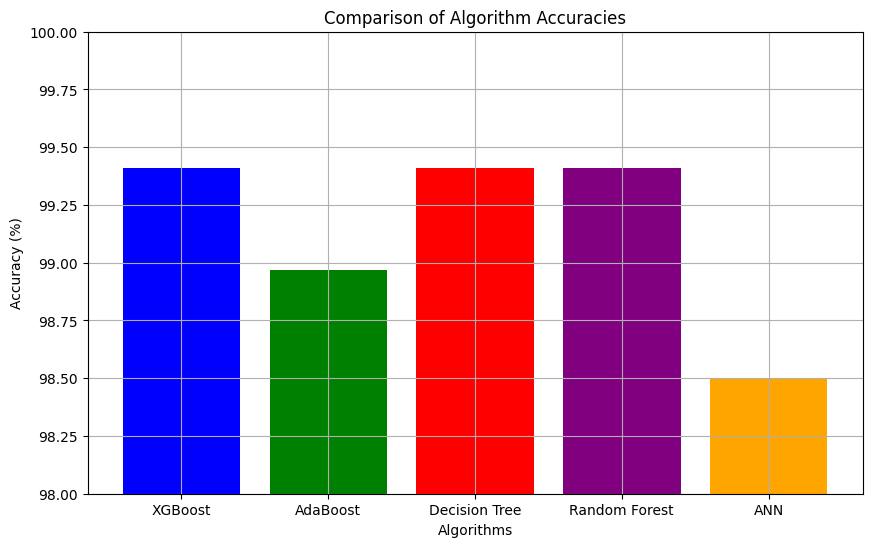

In [65]:
# prompt: plot the comparision plot for all the 5 algorithms including ann based on their accuracy 99.41, 98.97, 99.41, 99.41,98.5

algorithms = ['XGBoost', 'AdaBoost', 'Decision Tree', 'Random Forest', 'ANN']
accuracy_scores = [99.41, 98.97, 99.41, 99.41, 98.5]

plt.figure(figsize=(10, 6))
plt.bar(algorithms, accuracy_scores, color=['blue', 'green', 'red', 'purple', 'orange'])
plt.xlabel('Algorithms')
plt.ylabel('Accuracy (%)')
plt.title('Comparison of Algorithm Accuracies')
plt.ylim([98, 100])
plt.grid(True)
plt.show()


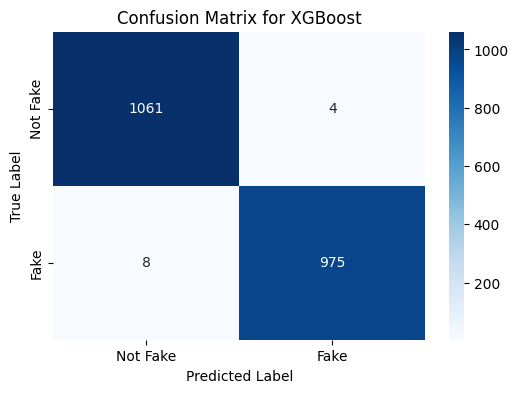

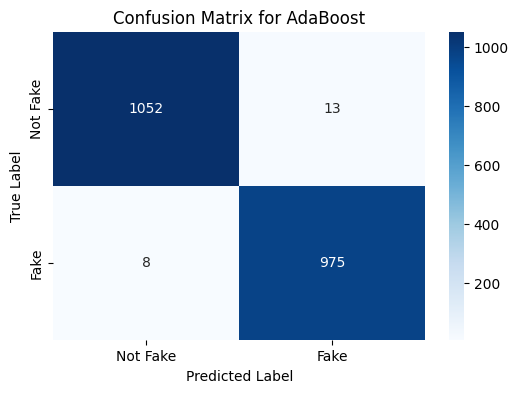

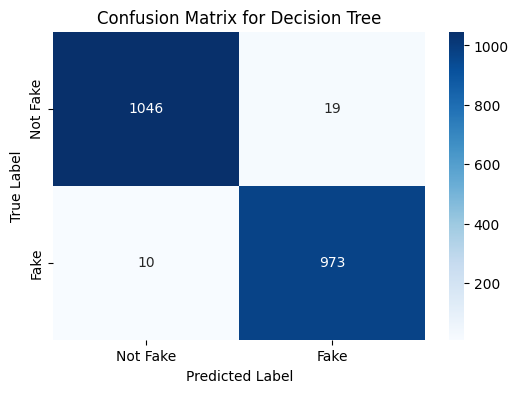

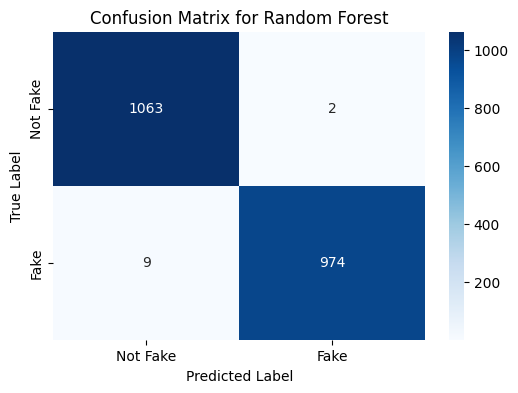

In [60]:

from sklearn.metrics import confusion_matrix

# List of models
models = {
    "XGBoost": XGBClassifier(),
    "AdaBoost": AdaBoostClassifier(n_estimators=50, learning_rate=1),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100)
}

for name, model in models.items():
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  cm = confusion_matrix(y_test, y_pred)
  print(f"\nConfusion Matrix for {name}:")
cm




In [62]:


from sklearn.metrics import precision_score, recall_score, f1_score

# List of models
models = {
    "XGBoost": XGBClassifier(),
    "AdaBoost": AdaBoostClassifier(n_estimators=50, learning_rate=1),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100)
}

for name, model in models.items():
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  cm = confusion_matrix(y_test, y_pred)
  print(f"\nConfusion Matrix for {name}:")
  print(cm)

  # Calculate and print precision, recall, and F1-score
  precision = precision_score(y_test, y_pred)
  recall = recall_score(y_test, y_pred)
  f1 = f1_score(y_test, y_pred)

  print(f"Precision for {name}: {precision:.2f}")
  print(f"Recall for {name}: {recall:.2f}")
  print(f"F1-score for {name}: {f1:.2f}")



Confusion Matrix for XGBoost:
[[1061    4]
 [   8  975]]
Precision for XGBoost: 1.00
Recall for XGBoost: 0.99
F1-score for XGBoost: 0.99

Confusion Matrix for AdaBoost:
[[1052   13]
 [   8  975]]
Precision for AdaBoost: 0.99
Recall for AdaBoost: 0.99
F1-score for AdaBoost: 0.99

Confusion Matrix for Decision Tree:
[[1045   20]
 [  12  971]]
Precision for Decision Tree: 0.98
Recall for Decision Tree: 0.99
F1-score for Decision Tree: 0.98

Confusion Matrix for Random Forest:
[[1063    2]
 [  10  973]]
Precision for Random Forest: 1.00
Recall for Random Forest: 0.99
F1-score for Random Forest: 0.99
